# TEMP

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr

from dask.distributed import Client

import catalog
import util

xr.set_options(keep_attrs=True)

/glade/work/kristenk/miniconda/envs/cesm-exp/lib/python3.7/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


## Parameters

In [3]:
casename = 'g.e22a06.G1850ECOIAF_JRA_PHYS_DEV.TL319_g17.scope_v1'
component = 'pop'
stream = 'h'

variable_id = 'TEMP'

cluster_scheduler_address = None

In [4]:
# Parameters
casename = "g.e22a06.G1850ECOIAF_JRA_PHYS_DEV.TL319_g17.scope_v1"
component = "pop"
stream = "h"
variable_id = "TEMP"
cluster_scheduler_address = "tcp://10.12.206.26:40301"


In [5]:
assert component in ['pop']
assert stream in ['h', 'h.ecosys.nday1']

## Connect to cluster

In [6]:
if cluster_scheduler_address is None:
    cluster, client = util.get_ClusterClient()
    cluster.scale(12)
else:
    client = Client(cluster_scheduler_address)
client

<Client: 'tcp://10.12.206.26:40301' processes=32 threads=32, memory=744.96 GiB>

## Load the data

In [7]:
dsets = catalog.to_dataset_dict(
    case=casename,
    component=component,
    stream=stream,
)
dsets.keys()

dict_keys(['g.e22a06.G1850ECOIAF_JRA_PHYS_DEV.TL319_g17.scope_v1.pop.h'])

## Compute long-term mean and plot

In [8]:
ds = dsets[f'{casename}.{component}.{stream}']

In [9]:
dt_wgt = ds.time_bound.diff('d2').squeeze()
dt_wgt /= dt_wgt.sum()
dt_wgt

<xarray.DataArray 'time_bound' (time: 120)>
dask.array<truediv, shape=(120,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0052-01-16 12:00:00 ... 0061-12-16 12:00:00
Attributes:
    long_name:  boundaries for time-averaging interval
    units:      days since 0000-01-01 00:00:00

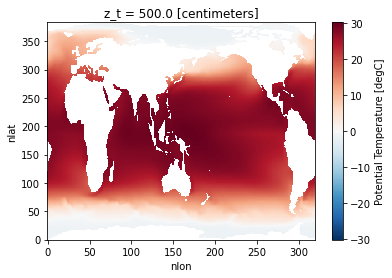

In [10]:
ds[variable_id].weighted(dt_wgt).mean('time').isel(z_t=0).plot()